[Plots.jl] Switched to backend: pyplot
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x8238750> PyObject <matplotlib.axes.AxesSubplot object at 0x8259c50>
 PyObject <matplotlib.axes.AxesSubplot object at 0x8243b10> PyObject <matplotlib.axes.AxesSubplot object at 0x8347910>]

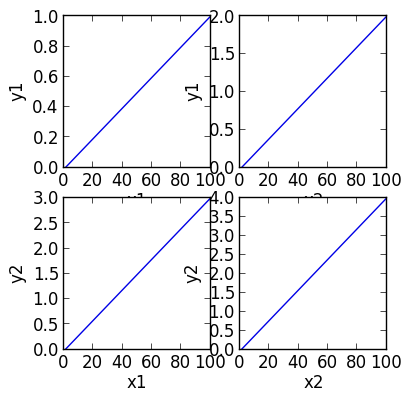


fig = PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x8238190>)
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x8238750>,PyObject <matplotlib.axes.AxesSubplot object at 0x8259c50>,PyObject <matplotlib.axes.AxesSubplot object at 0x8243b10>,PyObject <matplotlib.axes.AxesSubplot object at 0x8347910>]


In [5]:
using Plots
pyplot()
default(leg=false,size=(400,400));
y = collect(linspace(0,1,100))
p = subplot(Any[y*i for i in 1:4],n=4, ylabel=["y1","y1","y2","y2"], xlabel=["x1","x2","x1","x2"])


fig = PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x74d7410>)
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x74d7a10>,PyObject <matplotlib.axes.AxesSubplot object at 0x785dbd0>,PyObject <matplotlib.axes.AxesSubplot object at 0x7880d90>,PyObject <matplotlib.axes.AxesSubplot object at 0x7aca110>]


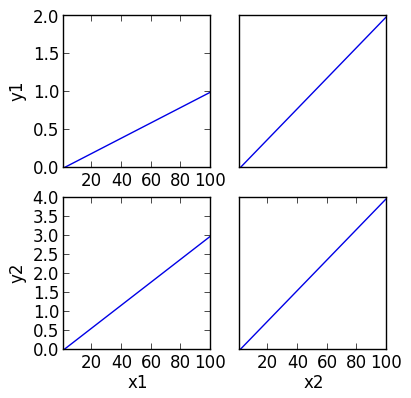

In [4]:
subplot!(link=true)
#xlims!(p.plts[1], (-5,50))
#ylims!(p.plts[1], -0.5,1)

In [ ]:
gplt = p.plts[1].o
plot!(p.plts[1], rand(100,5)*3)

In [22]:
lims = [Inf,-Inf]
for l in gplt.layers
    Plots.expandLimits!(lims, l.mapping[:y])
end
lims

2-element Array{Float64,1}:
 0.0    
 2.99946

In [ ]:
p = subplot(repmat(y,1,4),layout=[1,1,2])

In [ ]:
using Plots, StatsBase; pyplot()
default(size=(600,600),leg=false)
p = subplot(Any[rand(sample(10:200))*sample(1:10) for i in 1:6], n=6, link=true)
subplot!(xlabel=["x1","x2","x3"], ylabel=["y1","","","y2"])

[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: pyplot
[Plots.jl] Initializing backend: pyplot

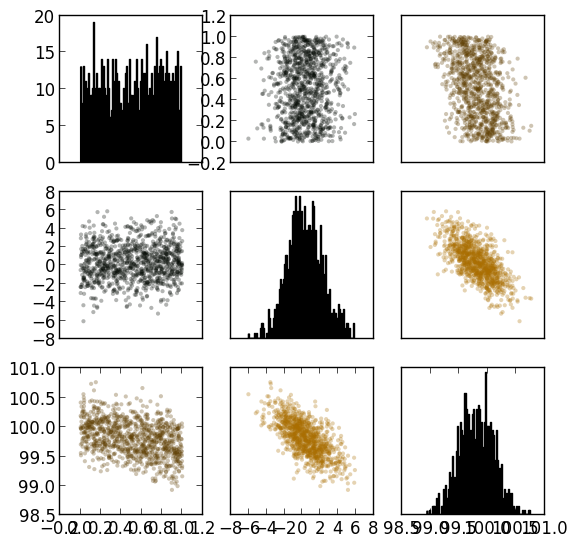

In [1]:
using Plots, OnlineStats
pyplot()
default(size=(800,800),leg=false)

n = 1000
x = rand(n)
y = 2randn(n) + 0.4x
z = 0.2randn(n) - 0.3x - 0.1y + 100

M = [x y z]
# M = repmat(M, 1, 2)
C = cor(CovarianceMatrix(M))

# debugplots()
p = corrplot(M, C, size=(600,600), colors=[colorant"orange", colorant"black", colorant"green"])

In [10]:
p.plts[1].o.ax

PyObject <matplotlib.axes.AxesSubplot object at 0x62223d0>

In [ ]:
for (r,c) in gl
    @show r,c
end
length(gl)

In [14]:
plot!(p.plts[1], xlim=(-5,5))
gui()